In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
# getting no of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting the info of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


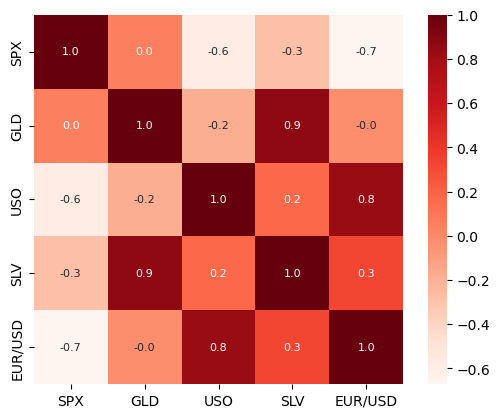

In [10]:
# Calculating correlation matrix
correlation = gold_data.corr(numeric_only = [True])
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Reds')
plt.show()

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9824\782231120.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

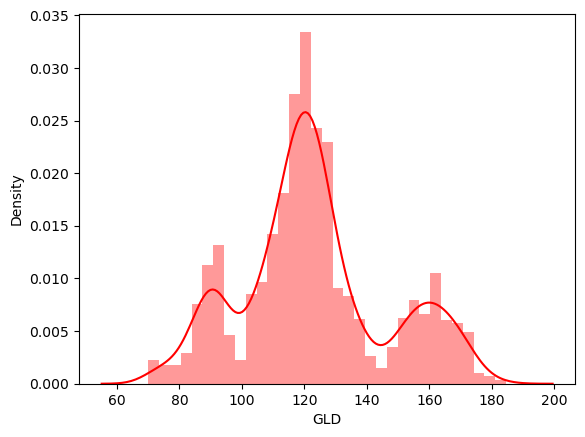

In [12]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='red')

In [13]:
#splitting the features and target
X= gold_data.drop(['Date','GLD'],axis=1)
Y= gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
#Splitting into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [15]:
# Model training random forest regress
regressor=RandomForestRegressor(n_estimators=100)

In [16]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [17]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.52679961  81.93389981 115.88549999 127.48760072 120.91370158
 154.68879819 150.34289819 126.17950027 117.50089872 126.02100081
 116.63760098 171.71650068 141.43589847 168.04019896 114.99900025
 117.48630047 139.20240328 170.14390099 159.46560282 159.94349961
 155.19760018 125.20359969 176.1806991  157.09990297 125.23460032
  93.62919936  77.53260024 120.21829997 119.05599924 167.61980024
  88.33880025 125.33320002  91.35140091 117.55190009 121.12999905
 136.32240103 115.51160137 115.06940083 148.22169953 106.9037011
 104.64320263  87.31569818 126.49550024 117.96280014 153.00599902
 119.74949973 108.43819998 108.12289816  93.22680075 127.14539761
  74.94260045 113.64679892 121.30410005 111.25549932 118.88249914
 120.55959967 158.78209969 168.00740188 147.10299789  85.80239817
  94.05350041  86.78449889  90.71310008 118.93050065 126.47100081
 127.56240039 169.52279997 122.31799893 117.30839895  98.66560065
 168.27120134 142.85059853 132.47110304 121.26250224 120.74739922
 119.567100

In [20]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.9894408436307085


In [19]:
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.3599488128702806


In [28]:
# MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, test_data_prediction)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 1.0553281697965324


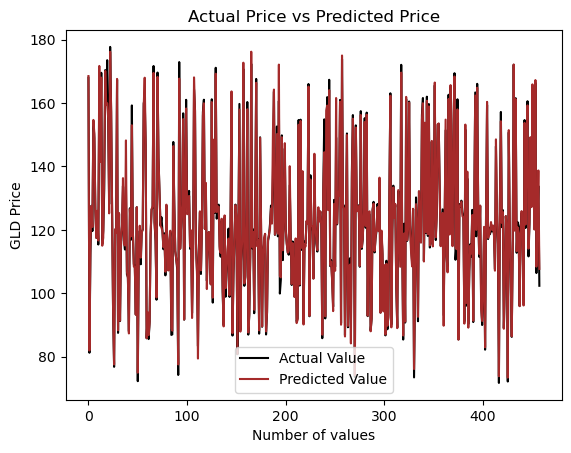

In [29]:
# Plot actual value vs predicted value
Y_test = list(Y_test)
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='brown', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


In [30]:
# Model training Linear regress
model= LinearRegression()

In [31]:
# training the model
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
# Prediction on test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.69577146
 120.03159609 1

In [35]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8657886565869237


In [34]:
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 8.413614015226472


In [36]:
# MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, test_data_prediction)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 4.673785467677878


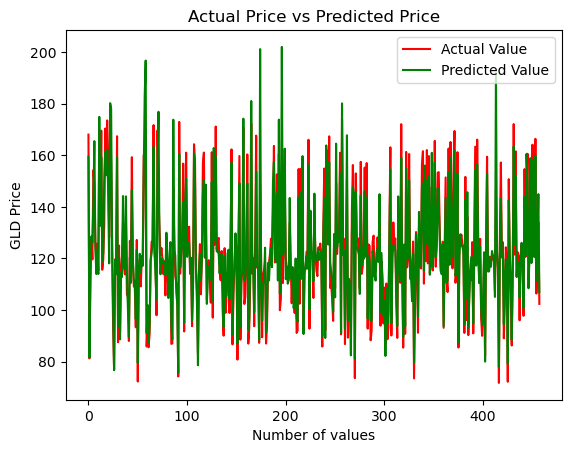

In [37]:
# Plot actual value vs predicted value
Y_test = list(Y_test)
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [38]:
# Model training SVR
smodel = SVR(kernel='rbf')  # You can specify different kernels as needed


In [39]:
# Training the model
smodel.fit(X_train, Y_train)

SVR()

In [40]:
# Prediction on test data
test_data_prediction = smodel.predict(X_test)
print(test_data_prediction)

[121.79313065 120.16377264 123.18085607 120.98738186 119.91540042
 121.78604442 121.6230228  119.45497709 122.56586986 122.4723685
 121.82545799 117.20987602 123.77189096 121.37533951 121.89666063
 119.75188564 121.48747287 123.07563929 122.18698181 120.56839915
 123.71788045 123.86299468 117.74605474 121.10751006 119.74715682
 114.35180176 119.06156447 123.636146   123.26444951 122.28820646
 109.08811048 119.37518049 119.75967699 122.75258384 116.35625995
 119.90199736 121.73314353 122.39637164 120.44522752 121.55781512
 115.68663652 121.93469532 119.3974798  116.39216705 120.76370316
 123.55277408 123.24632107 122.71815542 121.70340492 122.45897252
 107.50014223 121.6878801  121.38730933 122.24761143 119.48821501
 123.81238685 123.4998171  120.33120206 121.64975288 122.03298631
 121.9675674  121.55335017 107.72159165 119.42746226 119.88402166
 123.7841664  122.0142315  119.38014284 122.46876016 115.18065346
 119.95860526 121.40886448 118.07474051 115.3730468  122.3699792
 123.3764009

In [41]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.1139286536869738


In [42]:
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 21.61833880593488


In [43]:
# MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, test_data_prediction)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 13.288709426366824


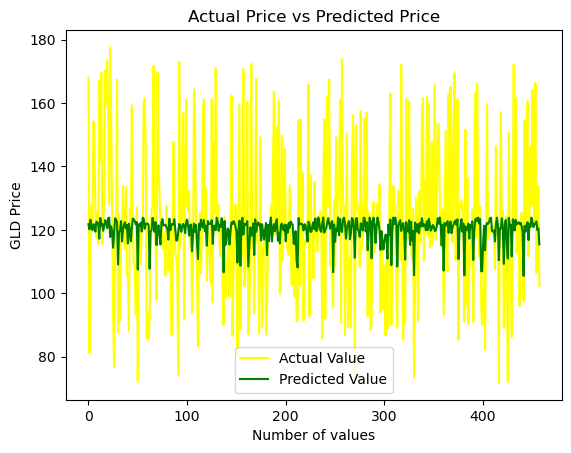

In [44]:
# Plot actual value vs predicted value
Y_test = list(Y_test)
plt.plot(Y_test, color='yellow', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


In [45]:
# Model training Decision Tree regressor
dmodel = DecisionTreeRegressor()

In [46]:
# Training the model
dmodel.fit(X_train, Y_train)

DecisionTreeRegressor()

In [47]:
# Prediction on test data
test_data_prediction = dmodel.predict(X_test)
print(test_data_prediction)

[168.5       86.089996 115.480003 127.779999 121.730003 155.139999
 149.149994 126.559998 117.389999 125.620003 117.959999 174.580002
 141.919998 167.179993 115.839996 116.5      134.100006 168.970001
 159.570007 132.850006 155.360001 125.699997 177.210007 157.320007
 125.459999  93.449997  84.279999 122.290001 119.220001 167.820007
  88.330002 124.769997  91.730003 118.290001 121.300003 135.410004
 114.730003 115.800003 134.119995 105.720001 104.370003  87.239998
 127.610001 118.360001 157.779999 119.959999 108.419998 107.519997
  93.800003 128.539993  72.510002 113.260002 120.110001 109.860001
 118.360001 121.129997 159.619995 161.020004 146.869995  85.199997
  93.800003  86.879997  90.949997 119.169998 126.139999 127.400002
 172.229996 122.970001 116.209999  97.550003 169.820007 142.380005
 132.490005 120.910004 122.739998 119.190002 113.910004 118.82
 106.260002 127.440002 114.209999 108.470001 115.57     119.699997
  89.910004  87.989998 142.380005 127.150002 114.209999 110.239998

In [48]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9838052162236559


In [49]:
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.9226415187845123


In [50]:
# MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, test_data_prediction)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 1.103501171888839


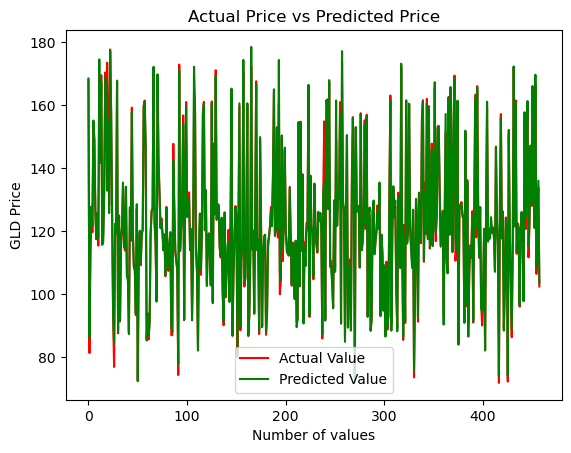

In [51]:
# Plot actual value vs predicted value
Y_test = list(Y_test)
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


In [52]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Model training ANN
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000)

In [54]:
# Training the model
model.fit(X_train_scaled, Y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)

In [55]:
# Prediction on test data
test_data_prediction = model.predict(X_test_scaled)
print(test_data_prediction)

[163.53972019  82.60044838 113.15997391 126.67321531 118.51456334
 154.61601878 147.83050295 124.34308962 117.52223709 124.4859544
 116.35738333 173.5316265  140.07440049 167.18744524 115.48571244
 115.73533909 151.86152782 168.52968515 157.48486294 156.6666337
 153.30651753 122.25168041 175.37041756 157.66215101 124.87427433
  97.01870367  78.88646343 124.25651036 117.78573483 171.65766126
  89.69151093 123.12649051  93.00966995 112.58403289 120.01637189
 147.16878959 115.35919701 115.24315279 150.84336942 107.09622024
 100.89417982  88.31303205 123.8647299  115.07773913 154.48163484
 123.84394835 111.03347678 107.90615685  93.72791836 125.32806095
  73.26072469 111.48745596 118.79395652 111.99302768 119.17562828
 121.74126154 157.08554563 167.39651331 159.83603736  88.07071119
  93.94416892  88.45382484  90.4678118  119.25029242 125.39595387
 130.4672302  157.68266499 121.80749415 117.79931183 104.23786174
 154.89155611 145.52542487 126.99651159 120.66483116 121.53216318
 124.005065 

In [56]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9637103968762772


In [57]:
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4.375010321005667


In [58]:
# MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, test_data_prediction)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 2.228470636546461


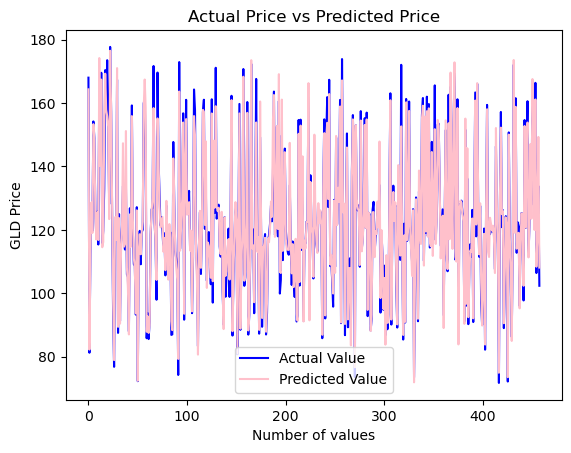

In [44]:
# Plot actual value vs predicted value
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='pink', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()